# 教師あり学習
教師あり学習は，最もよく用いられ，そしてうまく機能しているタイプの機械学習だ，本章では教師有学習について詳しく述べ，いくつかのよく使われる教師有学習アルゴリズムについて説明する．本章では教師有学習について詳しく述べ，いくつかのよく使われる教師あり学習アルゴリズムについて説明する，

## クラス分類と回帰
- 教師あり機械学習問題
    - **クラス分類** あらかじめ定められた選択肢の中から**クラスラベル**を予測すること
        - **２クラス分類** ２つだけのクラスを分類する特殊ケース（答えがyes/no）
        - **多クラス分類** ３つ以上のクラスを分類する問題（アイリス，Webサイトのテキストから，そのWebサイトの使用している言語を予測する問題）
    - **回帰** 目的は連続値の予測．（ある人の年収を学歴と年齢と住所から予測する/トウモロコシ農家の収穫量を，前年の収穫量，天候，従業員数から予測する）
 
クラス分類問題と回帰分類問題を区別するには，出力に何らかの連続性があるかを考えてみればよい．出力に連続性があるなら回帰問題である．

## 教師あり機械学習アルゴリズム

|サンプルデータ|
|:-|

これからさまざまなアルゴリズムを紹介するために，いくつかのデータセットを使う．そのうちのいくつかは，小さくて合成したもの（つまりでっちあげたもの）で，アルゴリズムの特定の側面を強調するように設計されている．この他に，大きい，実世界からとってきたデータセットも用いる．  
<span style="color:#FF69B4">forge= ①（文書・署名などを）偽造する ②（関係など）を形成する．作り上げる．</span>

scikit-learnに含まれているデータセットは，多くの場合Bunchというクラスのオブジェクトに格納されている．このオブジェクトには，実際のデータの他にデータセットに関する様々な情報が格納されている．このオブジェクトは，実際のデータのほかにデータセットに関する様々な情報が格納されている．Bunchオブジェクトは，ディクショナリのように振る舞うが，値を取り出す際に，bunch['key']ではなくbunch.keyのようにドットでアクセスできるということだけ覚えておけばよい．

**「mglearn」というライブラリはPythonの機械学習本「Pythonではじめる機械学習」のサポート教材をして作成された．この本に掲載されている例や図を再現するために使用されることが多い．**

In [173]:
import mglearn
import matplotlib.pyplot as plt
import numpy as np

In [174]:
X, y = mglearn.datasets.make_forge()
print("X")
print("type of X:", type(X))
print(X)
print("y")
print("type of y:", type(y))
print(len(y))
print(y)

X
type of X: <class 'numpy.ndarray'>
[[ 9.96346605  4.59676542]
 [11.0329545  -0.16816717]
 [11.54155807  5.21116083]
 [ 8.69289001  1.54322016]
 [ 8.1062269   4.28695977]
 [ 8.30988863  4.80623966]
 [11.93027136  4.64866327]
 [ 9.67284681 -0.20283165]
 [ 8.34810316  5.13415623]
 [ 8.67494727  4.47573059]
 [ 9.17748385  5.09283177]
 [10.24028948  2.45544401]
 [ 8.68937095  1.48709629]
 [ 8.92229526 -0.63993225]
 [ 9.49123469  4.33224792]
 [ 9.25694192  5.13284858]
 [ 7.99815287  4.8525051 ]
 [ 8.18378052  1.29564214]
 [ 8.7337095   2.49162431]
 [ 9.32298256  5.09840649]
 [10.06393839  0.99078055]
 [ 9.50048972 -0.26430318]
 [ 8.34468785  1.63824349]
 [ 9.50169345  1.93824624]
 [ 9.15072323  5.49832246]
 [11.563957    1.3389402 ]]
y
type of y: <class 'numpy.ndarray'>
26
[1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0]


X.shape: (26, 2)


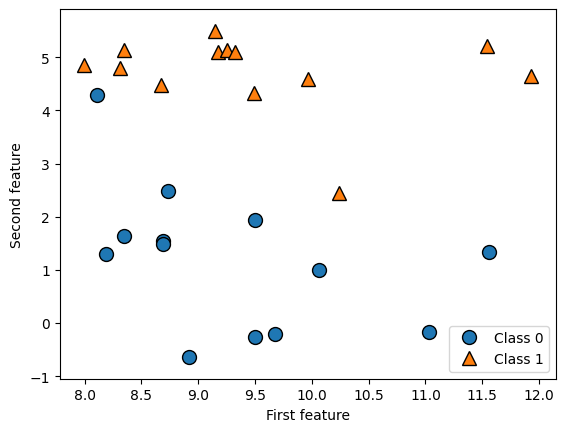

In [175]:
# データセットの生成
# X, y どちらもnumpy.array
X, y = mglearn.datasets.make_forge()
# データセットをプロット
# 横軸はX[:,0]（First feature）、縦軸X[:,1]（Second feature）をプロットし、yに従ってclassを分けている
mglearn.discrete_scatter(X[:,0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
# plt.show()
print("X.shape: {}".format(X.shape))

- 横軸：第一特徴量 縦軸：第二特徴量

- X.shapeからわかるように，このデータセットは，２つの特徴量を持つ26のデータポイントで構成されている．

In [176]:
X, y = mglearn.datasets.make_wave(n_samples=40)
print("X")
print("type of X:", type(X))
print(X)
print("y")
print("type of y:", type(y))
print(len(y))
print(y)

X
type of X: <class 'numpy.ndarray'>
[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]
 [-2.06403288]
 [-2.65149833]
 [ 2.19705687]
 [ 0.60669007]
 [ 1.24843547]
 [-2.87649303]
 [ 2.81945911]
 [ 1.99465584]
 [-1.72596534]
 [-1.9090502 ]
 [-1.89957294]
 [-1.17454654]
 [ 0.14853859]
 [-0.40832989]
 [-1.25262516]
 [ 0.67111737]
 [-2.16303684]
 [-1.24713211]
 [-0.80182894]
 [-0.26358009]
 [ 1.71105577]
 [-1.80195731]
 [ 0.08540663]
 [ 0.55448741]
 [-2.72129752]
 [ 0.64526911]
 [-1.97685526]
 [-2.60969044]
 [ 2.69331322]
 [ 2.7937922 ]
 [ 1.85038409]
 [-1.17231738]
 [-2.41396732]
 [ 1.10539816]
 [-0.35908504]]
y
type of y: <class 'numpy.ndarray'>
40
[-0.44822073  0.33122576  0.77932073  0.03497884 -1.38773632 -2.47196233
 -1.52730805  1.49417157  1.00032374  0.22956153 -1.05979555  0.7789638
  0.75418806 -1.51369739 -1.67303415 -0.90496988  0.08448544 -0.52734666
 -0.54114599 -0.3409073   0.21778193 -1.12469096  0.37299129  0.09756349
 -0.98618122  0.96695428 -1.134

Text(0, 0.5, 'Target')

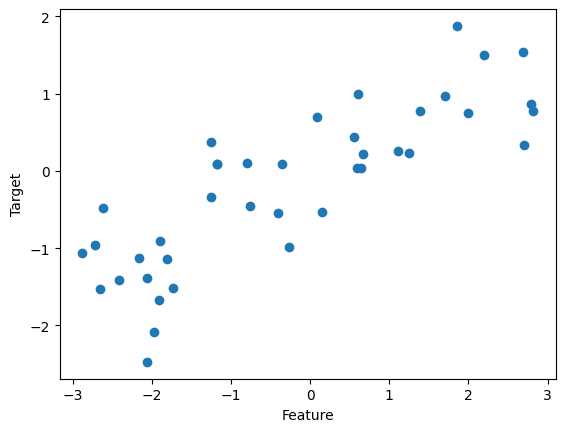

In [177]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim = (-3,3)
plt.xlabel("Feature")
plt.ylabel("Target")

- 横軸：特徴量 縦軸：<span style="color:#FF69B4">ターゲット</span>

<div style="background-color:#2F4F4F; padding: 10px;">
  <strong>
    教師あり学習において<span style="color:#FF69B4">ターゲット</span>とは，<span style="color:#FF69B4">モデルが予測または推定しようとしている値のこと</span>を指す．このターゲットは通常，訓練データに含まれている正解データ（ラベル）であり，モデルの学習プロセス中に使用される．
  </strong>
</div>

|ウィスコンシン乳がんデータセット|
|:-|

乳がんの腫瘍を計測したもので，それぞれの腫瘍に，害のない腫瘍を意味する「良性（benign）」か，悪性の腫瘍を意味する「（malignant）」かのラベルが付けられている．ここでのタスクは，組織の測定結果から腫瘍が悪性かどうかを予測するように学習することである．

In [178]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer)
print("cancer.keys(): \n{}".format(cancer.keys()))

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [179]:
print("Shape of cancer data: {}".format(cancer.data.shape)) #このデータセットは，30の特徴量を持つ569おデータポイントで構成されている．
print(cancer.data)#このデータセットは，30の特徴量を持つ569のデータポイントで構成されている．
print(len(cancer.data)) # 569
print(len(cancer.data[0])) # 30

Shape of cancer data: (569, 30)
[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
569
30


このデータセットは，569のデータポイントと30の特徴量で構成されている．

In [180]:
print("Sample counts per class:\n{}".format({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})) 
#悪性が212良性が357
# np.bincount(cancer.target)は，cancer.target内の0と1の要素数を数えてこの順番に要素数を出力する

Sample counts per class:
{'malignant': 212, 'benign': 357}


569のデータポイントのうち，212が悪性で357が良性である．

In [181]:
#個々の特徴量の意味を示す記述
print("Feature names:\n{}".format(cancer.feature_names))

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [182]:
print(len(cancer.feature_names)) # 特徴量の数を数える

30


実世界の回帰データセットとして，boston_housingデータセットを用いる．このデータセットを用いるタスクは，1970年代のボストン近郊の住宅地の住宅価格の中央値を，犯罪率，チャールズ川からの距離，高速道路への利便性などから予測するものだ，このデータセットには，13の特徴量を持つ506のデータポイントが含まれる．

In [183]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()
print("Data shape: {}".format(california.data.shape))

Data shape: (20640, 8)


<div style="background-color:#02383b; padding: 10px; border-radius: 5px;">

[`fetch_california_housing`](command:_github.copilot.openSymbolFromReferences?%5B%22fetch_california_housing%22%2C%5B%7B%22uri%22%3A%7B%22%24mid%22%3A1%2C%22fsPath%22%3A%22c%3A%5C%5CUsers%5C%5Cseiji%5C%5COneDrive%20-%20Kyoto%20University%20(1)%5C%5C1.Kyoto.Univ%E3%81%9D%E3%81%AE%E4%BB%96%5C%5Cprogramming%5C%5Cpython%5C%5CPython%E3%81%A7%E5%A7%8B%E3%82%81%E3%82%8B%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%5C%5Cpython_macinelearning_oreilly%5C%5C2%E7%AB%A0_%E6%95%99%E5%B8%AB%E3%81%82%E3%82%8A%E5%AD%A6%E7%BF%92.ipynb%22%2C%22_sep%22%3A1%2C%22external%22%3A%22vscode-notebook-cell%3A%2Fc%253A%2FUsers%2Fseiji%2FOneDrive%2520-%2520Kyoto%2520University%2520%25281%2529%2F1.Kyoto.Univ%25E3%2581%259D%25E3%2581%25AE%25E4%25BB%2596%2Fprogramming%2Fpython%2FPython%25E3%2581%25A7%25E5%25A7%258B%25E3%2582%2581%25E3%2582%258B%25E6%25A9%259F%25E6%25A2%25B0%25E5%25AD%25A6%25E7%25BF%2592%2Fpython_macinelearning_oreilly%2F2%25E7%25AB%25A0_%25E6%2595%2599%25E5%25B8%25AB%25E3%2581%2582%25E3%2582%258A%25E5%25AD%25A6%25E7%25BF%2592.ipynb%23X30sZmlsZQ%253D%253D%22%2C%22path%22%3A%22%2Fc%3A%2FUsers%2Fseiji%2FOneDrive%20-%20Kyoto%20University%20(1)%2F1.Kyoto.Univ%E3%81%9D%E3%81%AE%E4%BB%96%2Fprogramming%2Fpython%2FPython%E3%81%A7%E5%A7%8B%E3%82%81%E3%82%8B%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%2Fpython_macinelearning_oreilly%2F2%E7%AB%A0_%E6%95%99%E5%B8%AB%E3%81%82%E3%82%8A%E5%AD%A6%E7%BF%92.ipynb%22%2C%22scheme%22%3A%22vscode-notebook-cell%22%2C%22fragment%22%3A%22X30sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A0%2C%22character%22%3A29%7D%7D%5D%5D "Go to definition")は、Scikit-learnライブラリの`sklearn.datasets`モジュールに含まれる関数で、カリフォルニア州の住宅データセットを取得するために使用されます。このデータセットは、回帰分析の練習やテストに広く使用されます。

### 計画
1. [`fetch_california_housing`](command:_github.copilot.openSymbolFromReferences?%5B%22fetch_california_housing%22%2C%5B%7B%22uri%22%3A%7B%22%24mid%22%3A1%2C%22fsPath%22%3A%22c%3A%5C%5CUsers%5C%5Cseiji%5C%5COneDrive%20-%20Kyoto%20University%20(1)%5C%5C1.Kyoto.Univ%E3%81%9D%E3%81%AE%E4%BB%96%5C%5Cprogramming%5C%5Cpython%5C%5CPython%E3%81%A7%E5%A7%8B%E3%82%81%E3%82%8B%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%5C%5Cpython_macinelearning_oreilly%5C%5C2%E7%AB%A0_%E6%95%99%E5%B8%AB%E3%81%82%E3%82%8A%E5%AD%A6%E7%BF%92.ipynb%22%2C%22_sep%22%3A1%2C%22external%22%3A%22vscode-notebook-cell%3A%2Fc%253A%2FUsers%2Fseiji%2FOneDrive%2520-%2520Kyoto%2520University%2520%25281%2529%2F1.Kyoto.Univ%25E3%2581%259D%25E3%2581%25AE%25E4%25BB%2596%2Fprogramming%2Fpython%2FPython%25E3%2581%25A7%25E5%25A7%258B%25E3%2582%2581%25E3%2582%258B%25E6%25A9%259F%25E6%25A2%25B0%25E5%25AD%25A6%25E7%25BF%2592%2Fpython_macinelearning_oreilly%2F2%25E7%25AB%25A0_%25E6%2595%2599%25E5%25B8%25AB%25E3%2581%2582%25E3%2582%258A%25E5%25AD%25A6%25E7%25BF%2592.ipynb%23X30sZmlsZQ%253D%253D%22%2C%22path%22%3A%22%2Fc%3A%2FUsers%2Fseiji%2FOneDrive%20-%20Kyoto%20University%20(1)%2F1.Kyoto.Univ%E3%81%9D%E3%81%AE%E4%BB%96%2Fprogramming%2Fpython%2FPython%E3%81%A7%E5%A7%8B%E3%82%81%E3%82%8B%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%2Fpython_macinelearning_oreilly%2F2%E7%AB%A0_%E6%95%99%E5%B8%AB%E3%81%82%E3%82%8A%E5%AD%A6%E7%BF%92.ipynb%22%2C%22scheme%22%3A%22vscode-notebook-cell%22%2C%22fragment%22%3A%22X30sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A0%2C%22character%22%3A29%7D%7D%5D%5D "Go to definition")の概要を説明。
2. データセットの内容を説明。
3. 使用例を示す。

### 概要
- [`fetch_california_housing`](command:_github.copilot.openSymbolFromReferences?%5B%22fetch_california_housing%22%2C%5B%7B%22uri%22%3A%7B%22%24mid%22%3A1%2C%22fsPath%22%3A%22c%3A%5C%5CUsers%5C%5Cseiji%5C%5COneDrive%20-%20Kyoto%20University%20(1)%5C%5C1.Kyoto.Univ%E3%81%9D%E3%81%AE%E4%BB%96%5C%5Cprogramming%5C%5Cpython%5C%5CPython%E3%81%A7%E5%A7%8B%E3%82%81%E3%82%8B%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%5C%5Cpython_macinelearning_oreilly%5C%5C2%E7%AB%A0_%E6%95%99%E5%B8%AB%E3%81%82%E3%82%8A%E5%AD%A6%E7%BF%92.ipynb%22%2C%22_sep%22%3A1%2C%22external%22%3A%22vscode-notebook-cell%3A%2Fc%253A%2FUsers%2Fseiji%2FOneDrive%2520-%2520Kyoto%2520University%2520%25281%2529%2F1.Kyoto.Univ%25E3%2581%259D%25E3%2581%25AE%25E4%25BB%2596%2Fprogramming%2Fpython%2FPython%25E3%2581%25A7%25E5%25A7%258B%25E3%2582%2581%25E3%2582%258B%25E6%25A9%259F%25E6%25A2%25B0%25E5%25AD%25A6%25E7%25BF%2592%2Fpython_macinelearning_oreilly%2F2%25E7%25AB%25A0_%25E6%2595%2599%25E5%25B8%25AB%25E3%2581%2582%25E3%2582%258A%25E5%25AD%25A6%25E7%25BF%2592.ipynb%23X30sZmlsZQ%253D%253D%22%2C%22path%22%3A%22%2Fc%3A%2FUsers%2Fseiji%2FOneDrive%20-%20Kyoto%20University%20(1)%2F1.Kyoto.Univ%E3%81%9D%E3%81%AE%E4%BB%96%2Fprogramming%2Fpython%2FPython%E3%81%A7%E5%A7%8B%E3%82%81%E3%82%8B%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%2Fpython_macinelearning_oreilly%2F2%E7%AB%A0_%E6%95%99%E5%B8%AB%E3%81%82%E3%82%8A%E5%AD%A6%E7%BF%92.ipynb%22%2C%22scheme%22%3A%22vscode-notebook-cell%22%2C%22fragment%22%3A%22X30sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A0%2C%22character%22%3A29%7D%7D%5D%5D "Go to definition")は、カリフォルニア州の住宅価格に関するデータセットをロードします。
- データセットには、1990年のカリフォルニア州の各地区の住宅価格と、それに関連する8つの特徴量が含まれています。

### データセットの内容
- 特徴量（8つの特徴量）：
  - `MedInc`: 地区の世帯の中央値収入
  - `HouseAge`: 地区の住宅の中央値の築年数
  - `AveRooms`: 1世帯あたりの平均部屋数
  - `AveBedrms`: 1世帯あたりの平均寝室数
  - `Population`: 地区の人口
  - `AveOccup`: 1世帯あたりの平均居住者数
  - `Latitude`: 地区の緯度
  - `Longitude`: 地区の経度
- 目標変数：
  - `MedHouseVal`: 地区の住宅価格の中央値

### 使用例

</div>

In [184]:
from sklearn.datasets import fetch_california_housing

# データセットをロード
housing = fetch_california_housing()

# 特徴量と目標変数を取得
X = housing.data
y = housing.target

# データの概要を表示
print(housing.DESCR)
print(X.shape)  # 特徴量の形状
print(y.shape)  # 目標変数の形状

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

<div style="background-color:#02023b; padding: 10px; border-radius: 5px;">

このコードでは、[`fetch_california_housing`](command:_github.copilot.openSymbolFromReferences?%5B%22fetch_california_housing%22%2C%5B%7B%22uri%22%3A%7B%22%24mid%22%3A1%2C%22fsPath%22%3A%22c%3A%5C%5CUsers%5C%5Cseiji%5C%5COneDrive%20-%20Kyoto%20University%20(1)%5C%5C1.Kyoto.Univ%E3%81%9D%E3%81%AE%E4%BB%96%5C%5Cprogramming%5C%5Cpython%5C%5CPython%E3%81%A7%E5%A7%8B%E3%82%81%E3%82%8B%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%5C%5Cpython_macinelearning_oreilly%5C%5C2%E7%AB%A0_%E6%95%99%E5%B8%AB%E3%81%82%E3%82%8A%E5%AD%A6%E7%BF%92.ipynb%22%2C%22_sep%22%3A1%2C%22external%22%3A%22vscode-notebook-cell%3A%2Fc%253A%2FUsers%2Fseiji%2FOneDrive%2520-%2520Kyoto%2520University%2520%25281%2529%2F1.Kyoto.Univ%25E3%2581%259D%25E3%2581%25AE%25E4%25BB%2596%2Fprogramming%2Fpython%2FPython%25E3%2581%25A7%25E5%25A7%258B%25E3%2582%2581%25E3%2582%258B%25E6%25A9%259F%25E6%25A2%25B0%25E5%25AD%25A6%25E7%25BF%2592%2Fpython_macinelearning_oreilly%2F2%25E7%25AB%25A0_%25E6%2595%2599%25E5%25B8%25AB%25E3%2581%2582%25E3%2582%258A%25E5%25AD%25A6%25E7%25BF%2592.ipynb%23X30sZmlsZQ%253D%253D%22%2C%22path%22%3A%22%2Fc%3A%2FUsers%2Fseiji%2FOneDrive%20-%20Kyoto%20University%20(1)%2F1.Kyoto.Univ%E3%81%9D%E3%81%AE%E4%BB%96%2Fprogramming%2Fpython%2FPython%E3%81%A7%E5%A7%8B%E3%82%81%E3%82%8B%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%2Fpython_macinelearning_oreilly%2F2%E7%AB%A0_%E6%95%99%E5%B8%AB%E3%81%82%E3%82%8A%E5%AD%A6%E7%BF%92.ipynb%22%2C%22scheme%22%3A%22vscode-notebook-cell%22%2C%22fragment%22%3A%22X30sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A0%2C%22character%22%3A29%7D%7D%5D%5D "Go to definition")関数を使用してデータセットをロードし、特徴量と目標変数を取得しています。また、データセットの概要と形状を表示しています。

</div>

In [185]:
from sklearn.datasets import fetch_california_housing

# データセットをロード
housing = fetch_california_housing()

# 特徴量と目標変数を取得
X = housing.data
y = housing.target

# データの概要を表示
print(housing.DESCR)
print(X.shape)  # 特徴量の形状
print(y.shape)  # 目標変数の形状

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

<div style="background-color:#02023b; padding: 10px; border-radius: 5px;">

このコードでは、[`fetch_california_housing`](command:_github.copilot.openSymbolFromReferences?%5B%22fetch_california_housing%22%2C%5B%7B%22uri%22%3A%7B%22%24mid%22%3A1%2C%22fsPath%22%3A%22c%3A%5C%5CUsers%5C%5Cseiji%5C%5COneDrive%20-%20Kyoto%20University%20(1)%5C%5C1.Kyoto.Univ%E3%81%9D%E3%81%AE%E4%BB%96%5C%5Cprogramming%5C%5Cpython%5C%5CPython%E3%81%A7%E5%A7%8B%E3%82%81%E3%82%8B%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%5C%5Cpython_macinelearning_oreilly%5C%5C2%E7%AB%A0_%E6%95%99%E5%B8%AB%E3%81%82%E3%82%8A%E5%AD%A6%E7%BF%92.ipynb%22%2C%22_sep%22%3A1%2C%22external%22%3A%22vscode-notebook-cell%3A%2Fc%253A%2FUsers%2Fseiji%2FOneDrive%2520-%2520Kyoto%2520University%2520%25281%2529%2F1.Kyoto.Univ%25E3%2581%259D%25E3%2581%25AE%25E4%25BB%2596%2Fprogramming%2Fpython%2FPython%25E3%2581%25A7%25E5%25A7%258B%25E3%2582%2581%25E3%2582%258B%25E6%25A9%259F%25E6%25A2%25B0%25E5%25AD%25A6%25E7%25BF%2592%2Fpython_macinelearning_oreilly%2F2%25E7%25AB%25A0_%25E6%2595%2599%25E5%25B8%25AB%25E3%2581%2582%25E3%2582%258A%25E5%25AD%25A6%25E7%25BF%2592.ipynb%23X30sZmlsZQ%253D%253D%22%2C%22path%22%3A%22%2Fc%3A%2FUsers%2Fseiji%2FOneDrive%20-%20Kyoto%20University%20(1)%2F1.Kyoto.Univ%E3%81%9D%E3%81%AE%E4%BB%96%2Fprogramming%2Fpython%2FPython%E3%81%A7%E5%A7%8B%E3%82%81%E3%82%8B%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%2Fpython_macinelearning_oreilly%2F2%E7%AB%A0_%E6%95%99%E5%B8%AB%E3%81%82%E3%82%8A%E5%AD%A6%E7%BF%92.ipynb%22%2C%22scheme%22%3A%22vscode-notebook-cell%22%2C%22fragment%22%3A%22X30sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A0%2C%22character%22%3A29%7D%7D%5D%5D "Go to definition")関数を使用してデータセットをロードし、特徴量と目標変数を取得しています。また、データセットの概要と形状を表示しています。

</div>

このデータセットは，20640のデータポイントと8の特徴量で構成されている．

In [186]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))

X.shape: (506, 104)


|k-最近傍法|
|:-|

k-最近傍法アルゴリズムは，最も単純な学習アルゴリズムであると言われる．モデルの構築は，訓練データセットを格納するだけだ．新しいデータポイントに対する予測を行う際には，訓練データセットの中から一番近い点つまり「最近傍点」を見つける．

```
# データセットの生成
X, y = mglearn.datasets.make_forge()
# データセットをプロット
mglearn.discrete_scatter(X[:,0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
# plt.show()
print("X.shape: {}".format(X.shape))
```

In [187]:
print(mglearn.plots)

<module 'mglearn.plots' from 'c:\\Users\\seiji\\anaconda3\\envs\\machine_learning_oreilly\\Lib\\site-packages\\mglearn\\plots.py'>


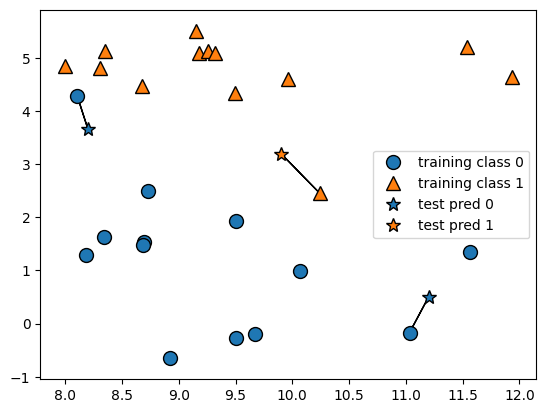

In [188]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

近傍点は１つとは限らず，任意個の，つまりk個の近傍点を考慮することもできる．これが，k-最近傍法の名前の由来だ．１つ以上の近傍点を考慮に入れる場合には，**投票**でラベルを決める．つまり，個々のテストする点に対して，近傍点のうち，いくつがクラス0に属し，いくつが1に属するのかを数えるのだ，そして，最も多くあらわれたクラスをその点に与える，言い換えればk-最近傍点の多数派のクラスを採用するのだ．

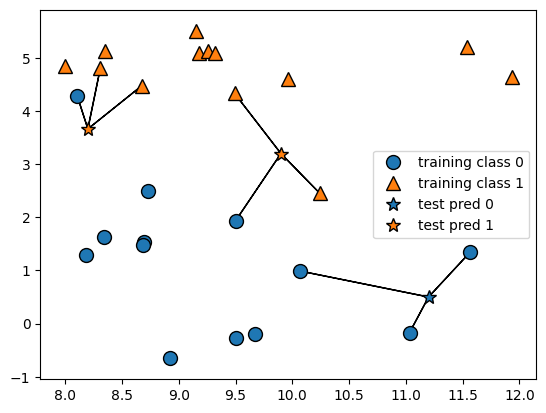

In [189]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

ここで示しているのは２クラス分類問題だが，この方法は任意のクラス数に対しても適用できる．クラスがたくさんあるときには，それぞれのクラスに対して近傍点がいくつあるかを数えて，最も多いクラスを予測値とすればよい．

|scikit-learnを用いてk-最近傍法アルゴリズムが適用できるかを見る|
|:-|

In [269]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
# random_stateに整数値を設定すると，その値をシード値として使用し，同じデータセットに対して何度実行しても同じようにデータが分割される．
# random_stateを設定しない場合，またはNoneに設定した場合，毎回異なる分割が行われる．
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print("X")
print(X)
print("y")
print(y)


X
[[ 9.96346605  4.59676542]
 [11.0329545  -0.16816717]
 [11.54155807  5.21116083]
 [ 8.69289001  1.54322016]
 [ 8.1062269   4.28695977]
 [ 8.30988863  4.80623966]
 [11.93027136  4.64866327]
 [ 9.67284681 -0.20283165]
 [ 8.34810316  5.13415623]
 [ 8.67494727  4.47573059]
 [ 9.17748385  5.09283177]
 [10.24028948  2.45544401]
 [ 8.68937095  1.48709629]
 [ 8.92229526 -0.63993225]
 [ 9.49123469  4.33224792]
 [ 9.25694192  5.13284858]
 [ 7.99815287  4.8525051 ]
 [ 8.18378052  1.29564214]
 [ 8.7337095   2.49162431]
 [ 9.32298256  5.09840649]
 [10.06393839  0.99078055]
 [ 9.50048972 -0.26430318]
 [ 8.34468785  1.63824349]
 [ 9.50169345  1.93824624]
 [ 9.15072323  5.49832246]
 [11.563957    1.3389402 ]]
y
[1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0]


In [270]:
# 分割された訓練データを表示
print("X_train")
print(X_train)
print("y_train")
print(y_train)

X_train
[[ 8.92229526 -0.63993225]
 [ 8.7337095   2.49162431]
 [ 9.32298256  5.09840649]
 [ 7.99815287  4.8525051 ]
 [11.0329545  -0.16816717]
 [ 9.17748385  5.09283177]
 [11.563957    1.3389402 ]
 [ 9.15072323  5.49832246]
 [ 8.34810316  5.13415623]
 [11.93027136  4.64866327]
 [ 8.1062269   4.28695977]
 [ 8.67494727  4.47573059]
 [ 9.67284681 -0.20283165]
 [ 9.50169345  1.93824624]
 [ 8.69289001  1.54322016]
 [ 9.96346605  4.59676542]
 [ 9.50048972 -0.26430318]
 [ 9.25694192  5.13284858]
 [ 8.68937095  1.48709629]]
y_train
[0 0 1 1 0 1 0 1 1 1 0 1 0 0 0 1 0 1 0]


In [271]:
# 分割されたテストデータを表示
print("X_test")
print(X_test)
print("y_test")
print(y_test)

X_test
[[11.54155807  5.21116083]
 [10.06393839  0.99078055]
 [ 9.49123469  4.33224792]
 [ 8.18378052  1.29564214]
 [ 8.30988863  4.80623966]
 [10.24028948  2.45544401]
 [ 8.34468785  1.63824349]]
y_test
[1 0 1 0 1 1 0]


In [240]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [241]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [242]:
print("Test set predictions: {}".format(clf.predict(X_test))) 
#テストデータに対して予測を行うにはpredictメソッドを呼び出す．テストセットのそれぞれのデータポイントに対して，
#訓練セットの中から最近傍点を計算し，最も多いクラスを見つけ出す．

Test set predictions: [1 0 1 0 1 0 0]


y_test（解答）は [1 0 1 0 1 1 0] だが，predictions（回答）は [1 0 1 0 1 0 0] なので正解率は6/7で0.86．

In [243]:
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test))) #テストセットに対する精度

Test set accuracy: 0.86


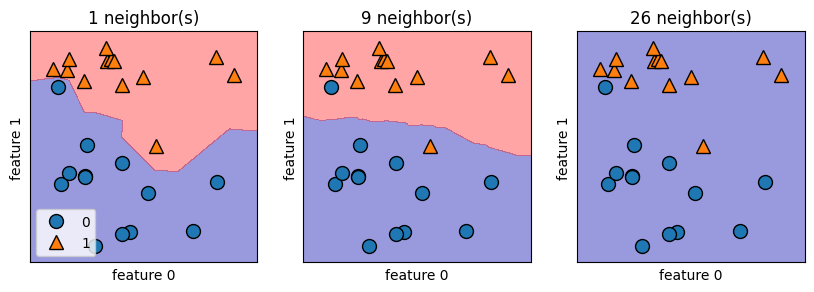

In [244]:
#kが1,3,9の場合の決定境界を描画する
fig, axes = plt.subplots(1, 3, figsize=(10,3))

for n_neighbors, ax in zip([1, 9, 26], axes):
    #fitメソッドは自分自身を返すので，１行で
    #インスタンスを生成してfitすることができる
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y) # X, y = mglearn.datasets.make_forge()
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

左の図からわかるように，一つの最近傍点のみを用いると，決定境界は，訓練データに近くなる．より多くの最近傍点を考慮すると，決定境界はよりなめらかになる．なめらかな境界は，単純なモデルに対応する．つまり，最近傍点が少ない場合は複雑度の高いモデル（訓練精度が高く，テスト精度が低い．また，それぞれの精度が乖離している）最近傍点が多い場合は複雑度の低いモデル（訓練精度とテスト精度の差が小さい）に対応している。また、近傍点数を訓練データセットのすべてのデータポイントの数にしたものが右の図である。すべてのテストデータは全く同じ近傍点を持つので、すべてのテストデータに対する予測結果は全く同じになる。予測結果は訓練セット中で最も多いクラスになる。（今回はクラス0とクラス1の数が同じなので、順番の早いクラス0が結果として出力されているか？）

**1 neighbor(s)の意味**  
図中の任意の場所に点を打ったとき，その点から最も近い1点のクラスがその点のクラスとして予想される．
**9 neighbor(s)の意味**  
図中の任意の場所に点を打ったとき，その点から最も近い9点のクラスがその点のクラスとして予想される。左図と比べて境界が滑らかになっている。
**1 neighbor(s)の意味**  
図中の任意の場所に点を打ったとき，その点から最も近い26点（すべての点）のクラスがその点のクラスとして予想される。どこに点を打ってもすべての点が

|実世界のcancerデータセットを用いてモデルの複雑さと汎化性能の関係を確認する|
|:-|

In [263]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt


In [265]:
cancer = load_breast_cancer()
print(cancer)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

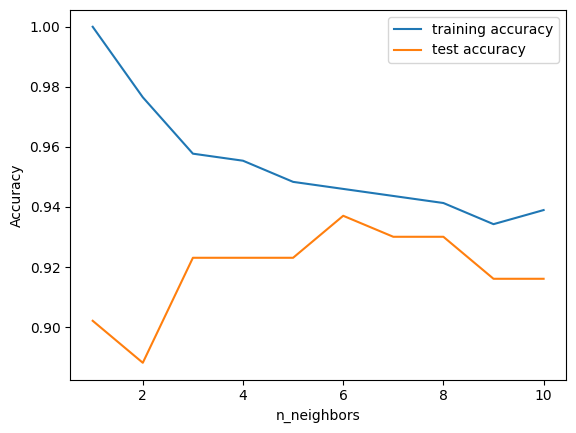

In [291]:
# stratify=cancer.targetとすることで，訓練セットとテストセットに含まれるクラス比率が元のデータセットと同じになるようにする
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

# 分割前のデータを作る
X = np.vstack((X_train, X_test))
y = np.hstack((y_train, y_test))

training_accuracy = []
test_accuracy = []
# n_neighborsを1から10まで試す
neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
    # モデルを構築
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # 訓練セット精度を記録
    training_accuracy.append(clf.score(X_train, y_train))
    # 汎化精度を記録
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

k-最近傍法には，回帰を行う変種がある．ここでも１最近傍点を用いる者から見ていく．今回はwaveデータセットを用いる．３つのテストデータポイントを緑色の星印としてx軸上に書いた．１最近傍点を用いる予測では，最近傍点の値をそのまま使う．青い星印が予測点である，

In [292]:
# import mglearn
# mglearn.plots.plot_knn_regression(n_neighbors=1)

クラス分類の場合と同様に，より多くの最近傍点を用いることもできる．複数の最近傍点を用いる場合には，最近傍点の平均値を用いる．

In [293]:
# mglearn.plots.plot_knn_regression(n_neighbors=3)

In [294]:
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=40)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# ３つの最近傍点を考慮するように設定してモデルのインスタンスを生成
reg = KNeighborsRegressor(n_neighbors=3)
# 訓練データと訓練ターゲットを用いてモデルを学習させる．
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [295]:
print("Test set predictions:\n{}".format(reg.predict(X_test))) # テストセットに対する精度

Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


scoreメソッドを用いてモデルを評価することもできる．このメソッドに対して回帰予測器は，$R^2$スコアを返す．$R^2$スコアは決定係数と呼ばれ，回帰モデルの予測の正確さを測る指標で，0から1までの値を取る．1は完全な予測に対応し，0は訓練セットのレスポンス値の平均を返すだけのものに対応する．

In [296]:
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.83


これは比較的良いモデルであることを意味する．

**一次元のデータセットに対して，すべての値に対する予測値がどのようになるかを見てみる．これには，たくさんのデータポイントを持つデータセットをつくればよい．**

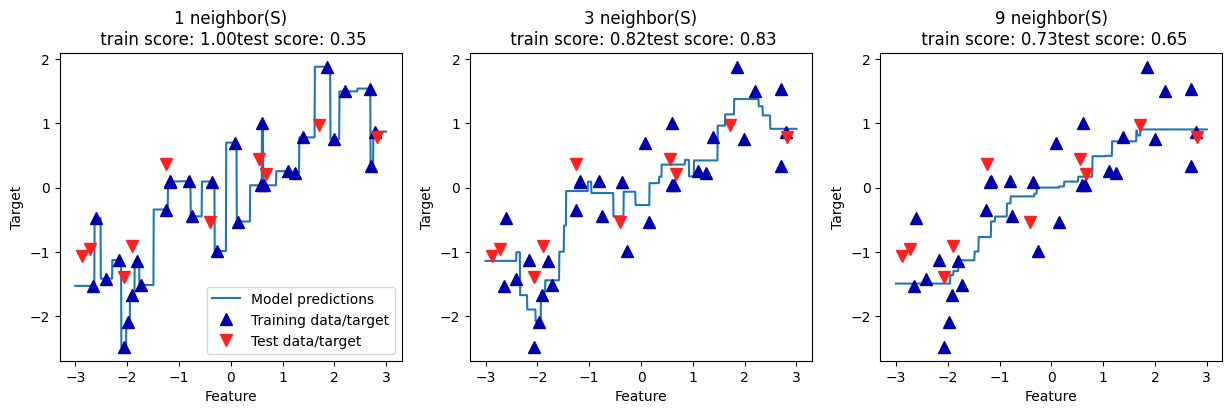

In [297]:
fig, axes = plt.subplots(1, 3, figsize=(15,4))
# -3から3までの間に1000点のデータポイントを作る．
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # 1, 3, 9近傍点で予測
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} neighbor(S)\n train score: {:.2f}test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
                "Test data/target"], loc ="best")
        

このグラフからわかるように，１最近傍点による回帰では訓練セットの個々の点が明らかに予測に影響を与えており，予測はすべて訓練データのポイントを通っている．このため予測は非常に不安定になっている．考慮する最近傍点を増やしていくと，予測はスムーズになるが，訓練データに対する適合度は下がる．

### 線形モデル

#### 線形モデルによる回帰

線形モデルは実用的に広く用いられており，この数十年間のあいだ盛んに研究されたモデルである．線形モデルは入力特徴量の**線形関数**を用いて予測を行うものである．

w[0]: 0.393906  b: -0.031804


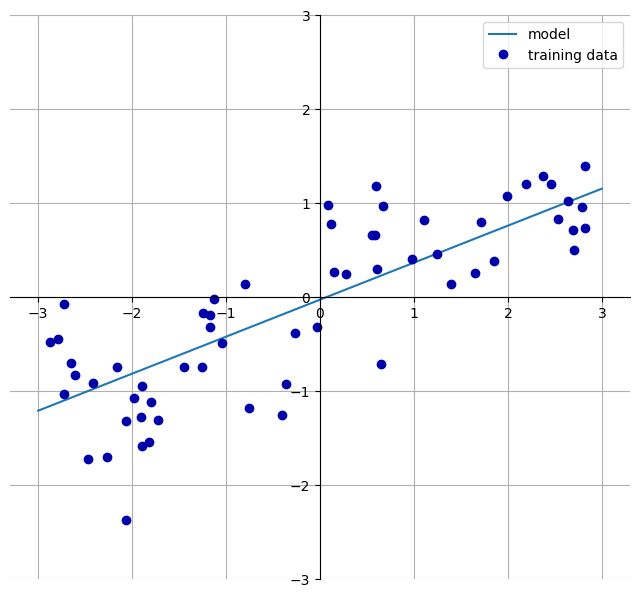

In [298]:
mglearn.plots.plot_linear_regression_wave()

線形モデルによる回帰では，傾きw[0]: 0.393906  y切片b: -0.031804 とわかった．


#### 線形回帰（通常最小二乗法）

線形回帰，もしくは線形最小二乗法は，最も単純で，最も古典的な線形回帰手法である．

In [299]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [300]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


線形回帰（通常最小二乗法）では
傾きlr.coef_: [0.39390555]
y切片lr.intercept_: -0.031804343026759746
とわかった．

訓練セットとテストセットに対する性能を確認する．

In [301]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


R^2が0.66というのはあまりよくないが，訓練セットとテストセットに対する値が非常に近い．これは，おそらくは適合不足で合って，過剰適合ではないことを意味する．このような１次元データセットは，モデルがとても単純なので過剰適合の危険は少ない．

In [302]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [303]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))


Training set score: 0.95
Test set score: 0.61


このように訓練セットとテストセットで性能が大きく異なるのは，過剰適合が起きている明らかな兆候である．したがって，腹圧度を制御できるモデルを探さなければならない．もっとも一般的な手法は**リッジ回帰**である．

#### リッジ回帰

リッジ回帰は線形モデルによる回帰の一つである．予測に用いられる．しかし，リッジ回帰では，係数（w）を，訓練データに対する予測だけでなく，他の制約に対しても最適化する．

In [304]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


結果からわかる通り，RidgeモデルはLinearRegressionモデルよりも訓練セットに対するスコアは低いが，テストセットに対するスコアは高い．これは期待された通りである．線形回帰ではデータに対して過剰適合していた．Ridgeは，製薬の強いモデルなので，過剰的具尾の危険は少ない．複雑どの低いモデルは，訓練セットに対する性能は低いが汎化性能は高い．我々が興味を持っているのは汎化性能だけなので，LinearRegressionモデルよりもRidgeモデルをつかったほうがよい．

Ridgeモデルでは，
モデルの簡潔さ（0に近い係数の数）と，訓練セットに対する性能がトレードオフの関係になる，このどちらに重くを置くかは，ユーザがalphaパラメータを用いて指定することができる．

In [305]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


alphaを小さくすると，係数の制約は小さくなる．（訓練精度が上がり，テスト精度（汎化性能）が下がることで過剰適合に近づく）alphaのせが非常に小さい値になると，係数への制約はほとんどなくなり，LinearRegressionと同じような挙動となる．

In [306]:
rigid01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(rigid01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(rigid01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


このケースでは，alpha=0.1がうまくいっているように見える，alpphaが大きい場合は小さな場合よりもcoef_の要素の絶対値が小さくなることが期待される．この期待が正しいことは以下で確認できる．

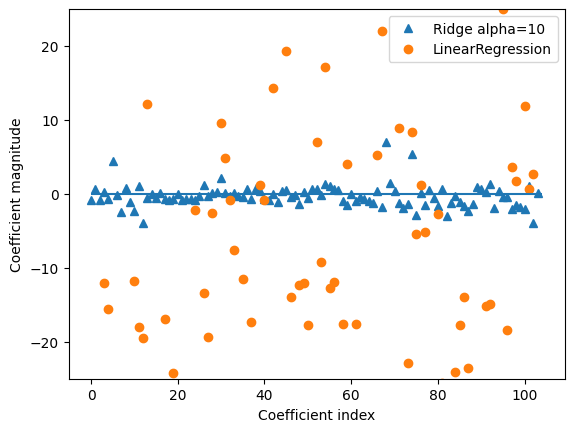

In [307]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
# plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
# plt.plot(rigid01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
ax.set_ylim(-25, 25)
plt.legend()